In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [3]:
c1 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x = open("/content/drive/MyDrive/PCD/data/data1_matriceB.txt", "r")
k=0
for line in fichier_matrice_x:
  l=list(line.split(" "))
  for j in range(10000):
    c1[k][j]=float(l[j])
  k+=1


In [4]:
c2 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x1 = open("/content/drive/MyDrive/PCD/data/data1_matriceBB.txt", "r")
k=0  
for line in fichier_matrice_x1:
  l1=list(line.split(" "))

  for j in range(10000):
    c2[k][j]=float(l1[j]) 
  k+=1

In [5]:
#spectral couche1
spectral = SpectralClustering(n_clusters=4,affinity='precomputed')
spectral.fit_predict(c1)
labels_c1 = spectral.labels_
#metrics
silhouette_avg = silhouette_score(c1, labels_c1)
Davies_M= sklearn.metrics.davies_bouldin_score(c1, labels_c1)
Calinski_Harabaz=metrics.calinski_harabasz_score(c1, labels_c1)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


4.555479263835004
2.6740029453254692
-0.33778141088114233


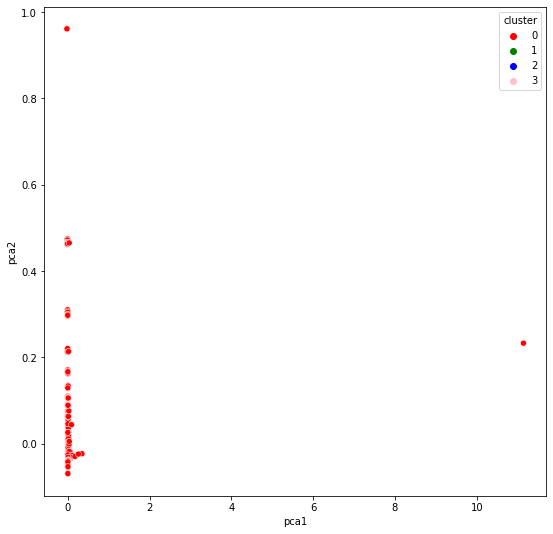

In [6]:
# graphe couche1
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(c1)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c1})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']

In [7]:
#spectral couche2
spectral = SpectralClustering(n_clusters=4,affinity='precomputed')
spectral.fit_predict(c2)
labels_c2 = spectral.labels_
#metrics
silhouette_avg = silhouette_score(c2, labels_c2)
Davies_M= sklearn.metrics.davies_bouldin_score(c2, labels_c2)
Calinski_Harabaz=metrics.calinski_harabasz_score(c2, labels_c2)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


2.074612473342757
2.987034724592972
-0.4049509510645606


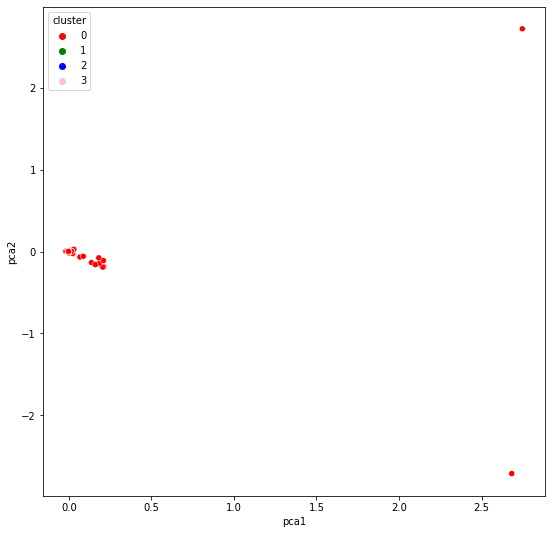

In [8]:
# graphe couche2
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(c2)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c2})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']

In [9]:
#fusionner les deux couches
M = np.zeros((10000,10000),dtype='float')
k=0
for i in range(10000):
  for j in range(i+1,10000):
    if(labels_c1[i]==labels_c1[j]):
      k+=1
    if(labels_c2[i]==labels_c2[j]):
      k+=1  
    M[i][j]=k
    M[j][i]=k
    k=0

In [10]:
scaler = StandardScaler()
data_scaled_cf = scaler.fit_transform(M)

In [11]:
#spectral couche_finale
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(M)
labels_cf = spectral.labels_
#metrics
silhouette_avg = silhouette_score(M, labels_cf)
Davies_M= sklearn.metrics.davies_bouldin_score(M, labels_cf)
Calinski_Harabaz=metrics.calinski_harabasz_score(M, labels_cf)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


9982.343868694745
2.273849930826197
0.0005502943724166674


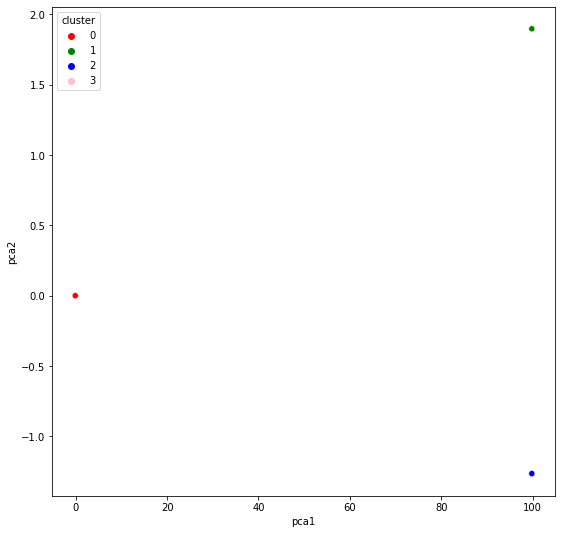

In [ ]:
# couche finale
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(M)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_cf})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']

In [ ]:
print(pca_df2)

          pca1          pca2  cluster
0    -0.099942  5.427972e-07        3
1    -0.099942  1.968897e-06        3
2    -0.099942  2.654582e-07        0
3    -0.099942 -1.031624e-06        3
4    -0.099942 -2.868414e-06        3
...        ...           ...      ...
9995 -0.099942 -1.086887e-06        0
9996 -0.099942 -1.349144e-06        3
9997 -0.099942  4.633744e-07        3
9998 -0.099942 -1.488019e-06        0
9999 -0.099942  3.180723e-07        0

[10000 rows x 3 columns]
